# Local Field Potentials (LFPs)

#### **Basic instructions:**
#### 1. **To run code cells**, you can either hit the play button to the left of the cell, or you can select the cell and **press shift-enter**.

#### 2. **The first time** you run this code notebook, you might get a popup asking to choose which version of Python to use (the python "kernel"). **Just hit enter** to choose the base/default version.

#### 3. Make sure you data (.abf) files are in the "data" folder here on the left. You can just copy/paste the files over from where they are saved on your computer.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from utils import *
update_plot_defaults()
%load_ext autoreload
%autoreload 2

## 1. Choose the data file you want to analyze

#### Put the .abf files with your Ih recordings in the "data/LFPs" folder

In [3]:
data_folder = "data/8-LFPs"

from glob import glob
data_files = glob(data_folder+"/*.abf")
print(data_folder)
data_files

data/8-LFPs


['data/8-LFPs/nav18-iv.abf']

Choose which file you want to analyze (copy name from above) and paste the file name here:

In [4]:
data_file = 'data/8-LFPs/nav18-iv.abf'

Now we can load the file and plot the raw data:

In [ ]:
traces = Trace.from_axon_file(filename=data_file, 
                              load_voltage=True, 
                              load_ttl=True,
                              units=['pA', 'mV', 'V'], 
                              concatenate_sweeps=False)
print(traces)

Trace('nav18-iv.abf')
Number of sweeps: 26
Points per sweep: 5,160
Duration per sweep: 0.052 s
Sampling rate: 100000 Hz
Sampling interval: 0.010 ms
Available channels: Current, Voltage, TTL


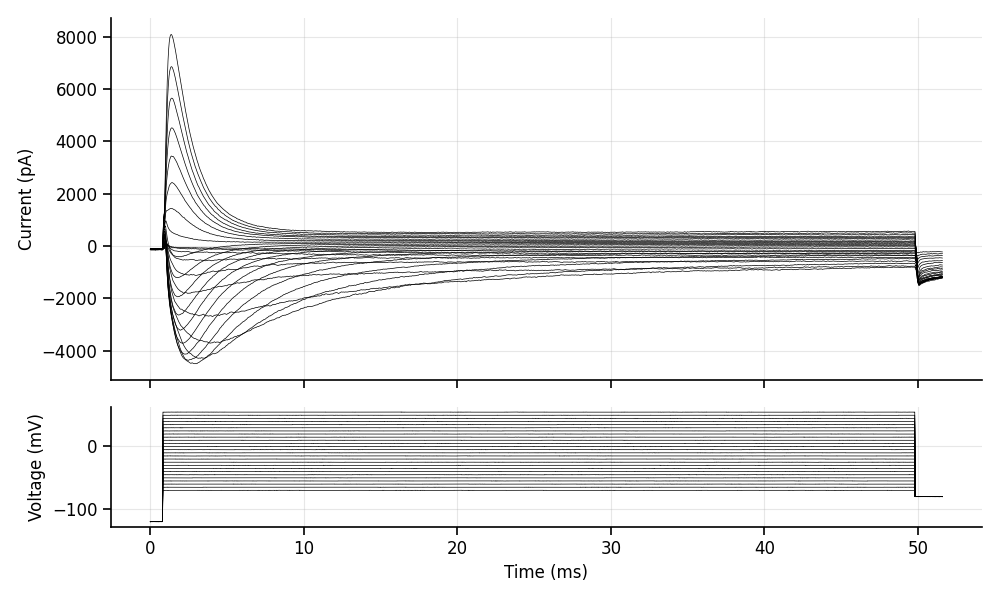

In [10]:
traces.plot(plot_ttl=False, plot_voltage=True, sweep='all', time_units='ms')
plt.show()

## 2. Signal processing

### Optional: apply baseline correction

If your baseline current is not zero, you may need to correct for that to get accurate measurements.

Uncomment this cell block (highlight everything, then cmd+/ on macOS or ctrl+/ on Windows) to run it.

In [11]:
# Change this to True if you want to subtract the baseline from the sweeps.
subtract_baseline = True

BASELINE SUBTRACTED:
Baseline currents: [0. 0. 0. ... 0. 0. 0.]
Baseline voltages: [-0.  0.  0. ...  0. -0.  0.]


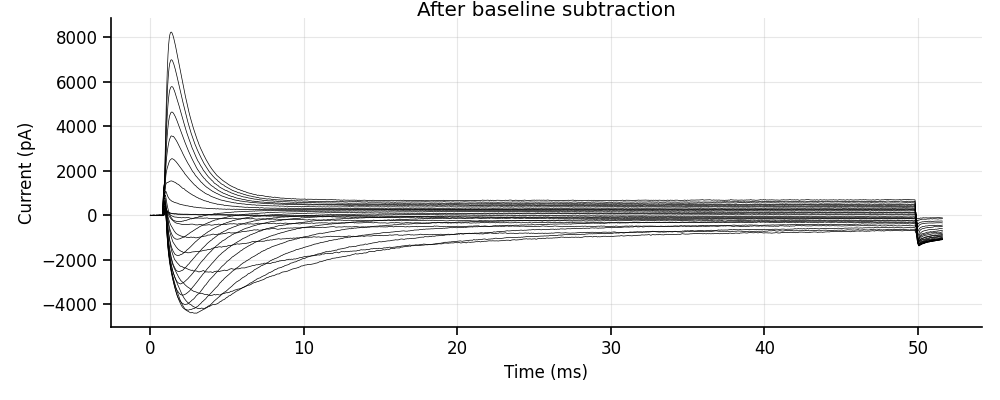

In [16]:
if subtract_baseline:
    traces.subtract_baseline(start_time = 0, 
                             end_time = 0.1, 
                             units = 'ms',  # specify seconds (s), or milliseconds (ms)
                             channel = 'all')  # Options: 'current', 'voltage', 'all'
    ax1 = traces.plot(plot_voltage=False, plot_ttl=False, time_units='ms', sweep='all')
    ax1.set_title('After baseline subtraction', y=0.98)
    plt.show()
else:
    print("BASELINE NOT SUBTRACTED")


### Optional: apply additional highpass/lowpass filtering

Depending in you recording, you may have 50/60 Hz line noise, high-frequency noise, or drift in your recordings.

The goal here is to only remove the noise with minimal distortion of the data, so be careful not to overdo it

In [20]:
# Change this to True if you want to subtract the baseline from the sweeps.
additional_filtering = False

if additional_filtering:
    filtered_traces = traces
    # Step 1: Detrend the data to remove linear or constant trends.
    filtered_traces = filtered_traces.detrend(detrend_type='linear', num_segments=1)

    # Step 2: Apply a highpass filter to remove low-frequency noise + lowpass to remove high-frequency noise
    filtered_traces = filtered_traces.filter(
        line_freq=60,    # Frequency (Hz) of electrical noise to remove: 50 Hz (in Europe) or 60 Hz (in the US).
        width=1,         # Width (Hz) controls the width of frequency bands around the line frequency the filter cuts out.
        highpass=0.01,   # Removes low-frequency drift. Set a value in Hz (e.g. 1 for 1 Hz).
        lowpass=2000,    # Removes high-frequency noise. Set a value in Hz (e.g. 100 for 100 Hz).
        order=4)         # Controls sharpness of the filter. Higher = sharper cutoff.


    ax = filtered_traces.plot(plot_voltage=False, plot_ttl=False)
    ax.set_title('After filtering', y=0.98)
    plt.show()

Once you are happy with the filter setting, run the next cell to implement them:

In [21]:
if additional_filtering:
    traces=filtered_traces